In [41]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [32]:
in_lora = pd.read_parquet('pred_in_revised.gzip')
rand_lora = pd.read_parquet('pred_rand_revised.gzip')
in_nolora = pd.read_parquet('pred_in_nolora.gzip')
rand_nolora = pd.read_parquet('pred_rand_nolora.gzip')

In [4]:
grounddf = pd.read_parquet('test.gzip')

In [12]:
groundtags = np.argmax(grounddf.tags.tolist(), axis=-1)

In [33]:
o1 = np.argmax(in_lora.output.tolist(), axis=-1)
o2 = np.argmax(rand_lora.output.tolist(), axis=-1)
o3 = np.argmax(in_nolora.output.tolist(), axis=-1)
o4 = np.argmax(rand_nolora.output.tolist(), axis=-1)

In [43]:
print(accuracy_score(groundtags, o1))
print(accuracy_score(groundtags, o2))
print(accuracy_score(groundtags, o3))
print(accuracy_score(groundtags, o4))
print(f1_score(o3, o4))

0.7711166666666667
0.8037666666666666
0.7853333333333333
0.7853333333333333
1.0


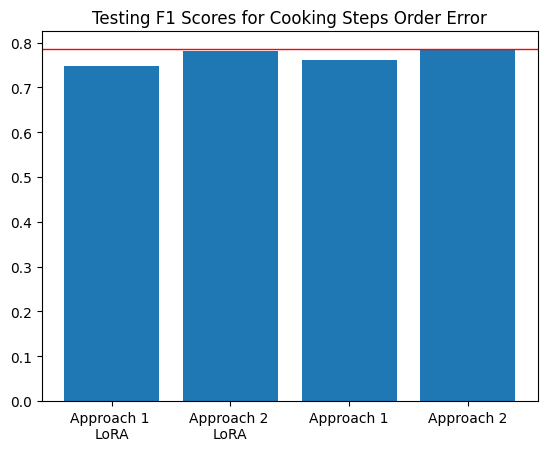

In [39]:
import matplotlib.pyplot as plt

x = np.array(["Approach 1 \nLoRA", "Approach 2 \nLoRA", "Approach 1", "Approach 2"])
y = np.array([f1_score(groundtags, o1), f1_score(groundtags, o2), f1_score(groundtags, o3), 0.7857234])

plt.bar(x,y)
plt.title('Testing F1 Scores for Cooking Steps Order Error')
plt.axhline(y=max([f1_score(groundtags, o1), f1_score(groundtags, o2), f1_score(groundtags, o3), 0.7857234]),linewidth=1, color='red')
plt.show()

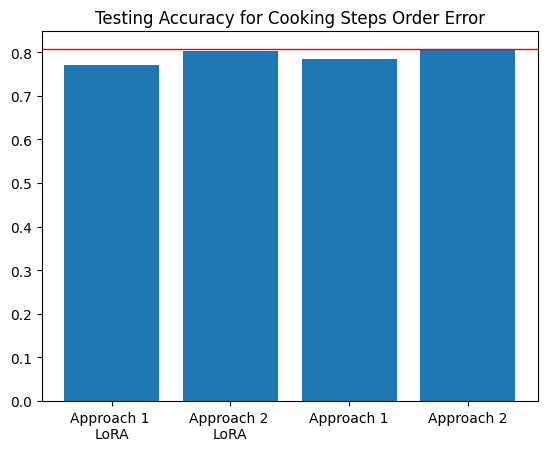

In [49]:
import matplotlib.pyplot as plt

x = np.array(["Approach 1 \nLoRA", "Approach 2 \nLoRA", "Approach 1", "Approach 2"])
y = np.array([accuracy_score(groundtags, o1), accuracy_score(groundtags, o2), accuracy_score(groundtags, o3), 0.807234])

plt.bar(x,y)
plt.title('Testing Accuracy for Cooking Steps Order Error')
plt.axhline(y=max([accuracy_score(groundtags, o1), accuracy_score(groundtags, o2), accuracy_score(groundtags, o3), 0.807234]),linewidth=1, color='red')
plt.show()